In [13]:
import yfinance as yf
import pandas as pd
import pandas_ta as pdta
import matplotlib.pyplot as plt
import numpy as np
import talib
import backtrader as bt


In [14]:

bseTicker = pd.read_html('https://en.wikipedia.org/wiki/BSE_SENSEX')[1].Symbol.to_list()

data = []

data = (yf.download(bseTicker[0],start='2021-05-20').reset_index())
bseTicker[0]

[*********************100%***********************]  1 of 1 completed


'ASIANPAINT.BO'

In [15]:
def parse_day(x):
    if x == 0:
       return 'Monday'
    elif x == 1:
       return 'Tuesday'
    elif x == 2:
       return 'Wednesday'
    elif x == 3:
       return 'Thursday'
    elif x == 4:
       return 'Friday'
    elif x == 5:
       return 'Saturday'
    elif x == 6:
       return 'Sunday'

In [16]:
def myResample(df2,multiplier):
    finalResult = []
    count=1
    CloseMean = 0
    OpenMean = 0
    for row in df2.iterrows():
        temp = []
        currentDate = row[1][2]
        dayOfWeek = row[1][2].dayofweek
        ClosePrice = row[1][0]
        OpenPrice = row[1][1]
        CloseMean = CloseMean + ClosePrice
        OpenMean = OpenMean + OpenPrice
        count += 1
        if count== multiplier+1:
            count=1
            temp.append(currentDate)
            temp.append(CloseMean/multiplier)
            temp.append(OpenMean/multiplier)
            CloseMean = 0
            OpenMean = 0
            finalResult.append(temp)

    resampleDF = pd.DataFrame(finalResult, columns = ['Date', 'CloseSeries','OpenSeries'])
    return resampleDF


In [17]:
def plotChart(data,bseTicker):
    pricex = data['Date']
    pricey = data['Adj Close']
    
    
    plt.rcParams["figure.figsize"] = (54, 10)
    plt.plot(pricex,pricey)
    plt.title(bseTicker)
    plt.show()
    
def plotChartSeries(data,bseTicker):
    pricex = data['Date']
    pricey = data['Close']
    smax = data['Date']
    smay = data['CloseSeries']
    
    superX = data['Date']
    superY = data['OpenSeries']
    
    plt.rcParams["figure.figsize"] = (54, 10)
    plt.plot(pricex,pricey, label='Price')
    plt.plot(smax,smay,label='CloseSeries',c='#0DF500')
    plt.plot(superX,superY,label='OpenSeries',c='#F50000')
    plt.title(bseTicker)
    plt.show()

In [18]:
#closeSeries = variant(basisType, close[delayOffset], basisLen, offsetSigma, offsetALMA)
#openSeries = variant(basisType, open[delayOffset], basisLen, offsetSigma, offsetALMA)

data['CloseSeries']= talib.DEMA(data['Close'], 8)
data['OpenSeries']= talib.DEMA(data['Open'], 8)

data = data.dropna()
df1 = data.set_index(['Date'])


#xlong = crossover(closeSeriesAlt, openSeriesAlt) -- this is buy or sell signal
#xshort = crossunder(closeSeriesAlt, openSeriesAlt)

In [41]:
#ohlc_dict = {                                                                                                             
#    'Open': 'first',                                                                                                    
#    'High': 'max',                                                                                                       
#    'Low': 'min',                                                                                                        
#    'Close': 'last',                                                                                                    
#    'Volume': 'sum',
#}

#df.resample('3D', closed='left', label='left').apply(ohlc_dict)


df2 = data[['Date','CloseSeries','OpenSeries']]
df2 = df2.set_index(['Date'])
df2['Date'] = df2.index


In [42]:
df2

,CloseSeries,OpenSeries,Date
Date,,,
2021-06-09,2939.776920,2936.234258,2021-06-09
2021-06-10,2946.383514,2942.851582,2021-06-10
2021-06-11,2953.208126,2955.750873,2021-06-11
2021-06-14,2953.973235,2961.423221,2021-06-14
2021-06-15,2991.183085,2964.604129,2021-06-15
...,...,...,...
2022-01-24,3233.545132,3300.502288,2022-01-24
2022-01-25,3185.797598,3211.663871,2022-01-25
2022-01-27,3143.486229,3176.111551,2022-01-27


In [48]:
#out = myResample(df2,4)
out = df2.resample('W-MON').mean()
out
#df2 = out
#df2

,CloseSeries,OpenSeries
Date,,
2021-06-14,2948.335449,2949.064984
2021-06-21,3028.385859,3005.445353
2021-06-28,3032.156154,3048.158570
2021-07-05,3008.524574,3017.634337
2021-07-12,3016.962122,3023.399828
2021-07-19,2996.125504,3014.186573
2021-07-26,3074.024445,3061.721184
2021-08-02,3022.654540,3052.794850
2021-08-09,2992.910435,3010.644996


In [31]:
finalDF = df1.copy()
finalDF = finalDF.drop(columns=['CloseSeries','OpenSeries'])
finalDF['Date'] = finalDF.index
finalDF.reset_index(inplace = True, drop = True)


In [38]:
len(df2)

35

In [21]:
finalDF = df1.copy()
finalDF = finalDF.drop(columns=['CloseSeries','OpenSeries'])
finalDF['Date'] = finalDF.index
finalDF.reset_index(inplace = True, drop = True)
outputNAN = finalDF.merge(df2,on='Date', how='left')
outputNAN = outputNAN.fillna(method='ffill')
output = outputNAN.dropna()
print(output.to_string())

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, Date, CloseSeries, OpenSeries]
Index: []


In [12]:
output = pd.concat([outputNAN.ffill()])
output['Date'] = output.index
output.reset_index(inplace = True, drop = True)
output

#Remove NAN values from Close and Open Series
#output = pd.concat([output.ffill(), output.bfill()]).groupby(level=0).mean()
output = output.dropna()
output

,Open,High,Low,Close,Adj Close,Volume,Date,CloseSeries,OpenSeries


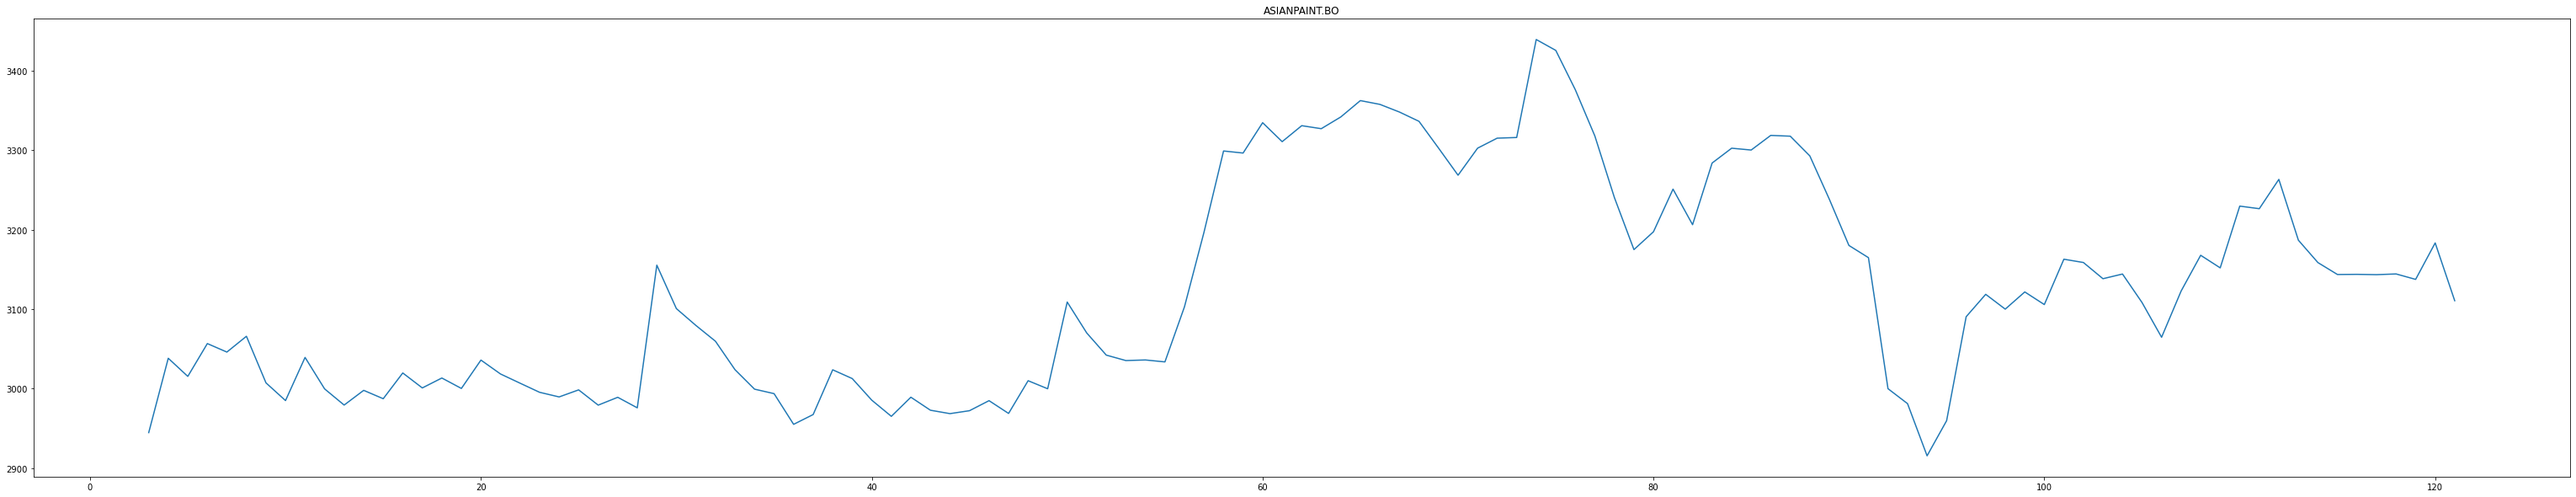

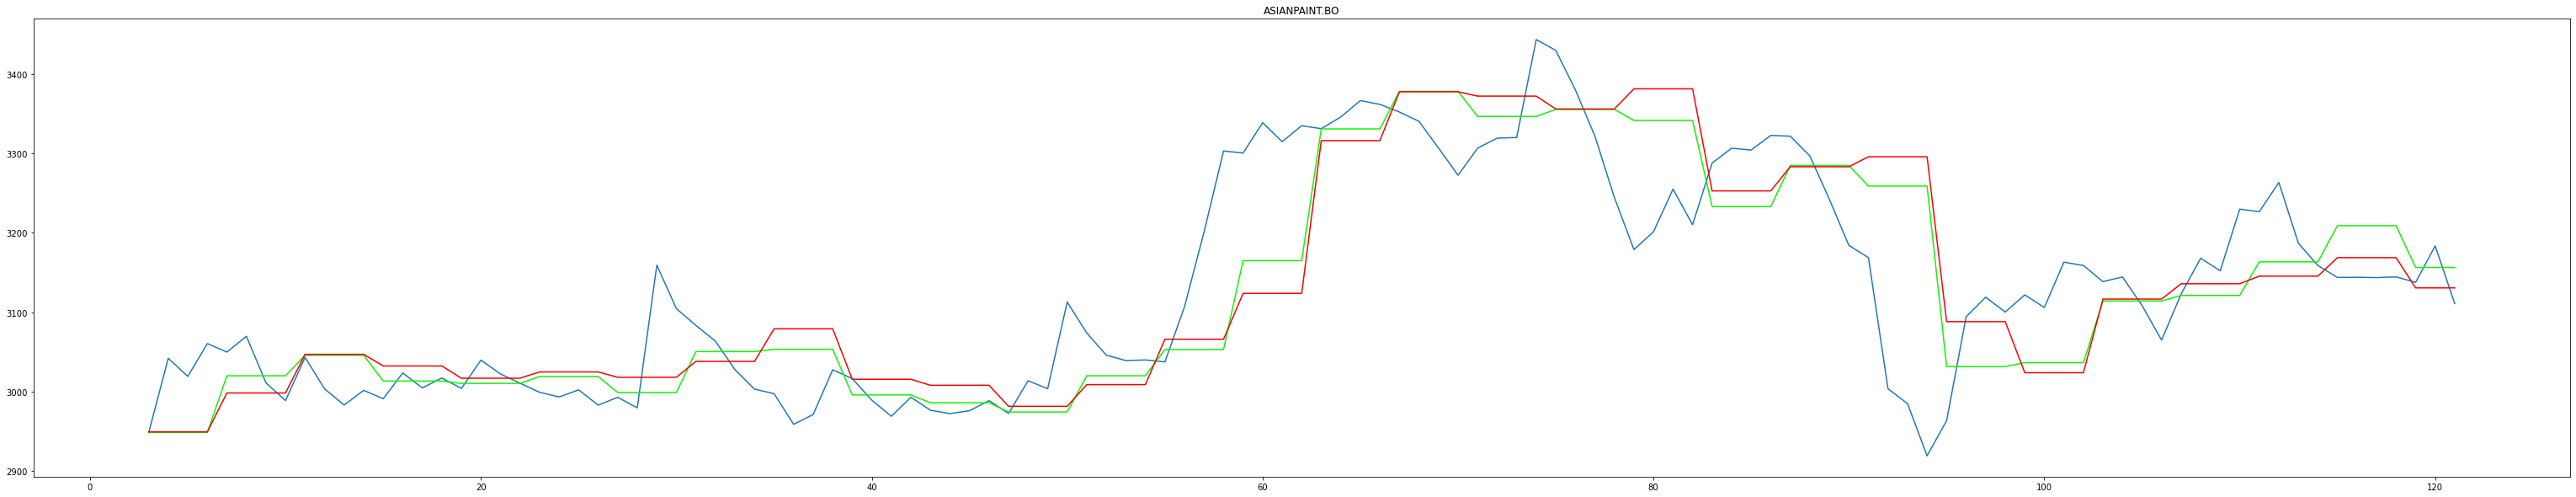

In [109]:
plotChart(output,bseTicker[0])
plotChartSeries(output,bseTicker[0])
#plotChartSeries(data,bseTicker[0])